In [1]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd

In [2]:
engine = create_engine("sqlite:///mta_data.db")

In [3]:
insp = inspect(engine)
print(insp.get_table_names())

['mta_data']


# Moving Data to Pandas for Cleaning and Analysis

In [4]:
# Choose not pull in DIVISION as that column not needed for analysis
# Did not pull in 2020 dates, only using 2021 data

df_mta = pd.read_sql("""SELECT "C/A", UNIT, SCP, STATION, LINENAME, DATE, TIME, DESC, ENTRIES, EXITS 
                        FROM mta_data WHERE DATE NOT LIKE "%2020"
                        ORDER BY STATION, UNIT, SCP, DATE, TIME;""", engine )

In [5]:
df_mta.shape

(7355276, 10)

In [6]:
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS
0,H007,R248,00-00-00,1 AV,L,01/01/2021,03:00:00,REGULAR,15512487,17566757
1,H007,R248,00-00-00,1 AV,L,01/01/2021,07:00:00,REGULAR,15512489,17566802
2,H007,R248,00-00-00,1 AV,L,01/01/2021,11:00:00,REGULAR,15512503,17566903
3,H007,R248,00-00-00,1 AV,L,01/01/2021,15:00:00,REGULAR,15512538,17567059
4,H007,R248,00-00-00,1 AV,L,01/01/2021,19:00:00,REGULAR,15512578,17567190


In [7]:
df_mta.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS
7355271,R419,R326,00-05-01,ZEREGA AV,6,09/03/2021,05:00:00,REGULAR,39,182
7355272,R419,R326,00-05-01,ZEREGA AV,6,09/03/2021,09:00:00,REGULAR,39,182
7355273,R419,R326,00-05-01,ZEREGA AV,6,09/03/2021,13:00:00,REGULAR,39,182
7355274,R419,R326,00-05-01,ZEREGA AV,6,09/03/2021,17:00:00,REGULAR,39,182
7355275,R419,R326,00-05-01,ZEREGA AV,6,09/03/2021,21:00:00,REGULAR,39,182


In [8]:
df_mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE', 'TIME', 'DESC',
       'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
df_mta.columns = [column.strip() for column in df_mta.columns]
df_mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE', 'TIME', 'DESC',
       'ENTRIES', 'EXITS'],
      dtype='object')

In [10]:
df_mta.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7355276 entries, 0 to 7355275
Data columns (total 10 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   C/A       7355276 non-null  object
 1   UNIT      7355276 non-null  object
 2   SCP       7355276 non-null  object
 3   STATION   7355276 non-null  object
 4   LINENAME  7355276 non-null  object
 5   DATE      7355276 non-null  object
 6   TIME      7355276 non-null  object
 7   DESC      7355276 non-null  object
 8   ENTRIES   7355276 non-null  int64 
 9   EXITS     7355276 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 561.2+ MB


In [11]:
df_mta.describe()

,ENTRIES,EXITS
count,7.355276e+06,7.355276e+06
mean,4.192492e+07,3.363603e+07
std,2.186116e+08,1.932745e+08
min,0.000000e+00,0.000000e+00
25%,2.201160e+05,9.579900e+04
50%,1.449856e+06,8.736350e+05
75%,6.107855e+06,4.025998e+06
max,2.147432e+09,2.133797e+09


In [12]:
# YTD Data 9/3/2021
df_mta.DATE.value_counts().sort_index()

01/01/2021    30696
01/02/2021    30595
01/03/2021    29807
01/04/2021    29779
01/05/2021    29802
              ...  
08/30/2021    30738
08/31/2021    29865
09/01/2021    30159
09/02/2021    29664
09/03/2021    29534
Name: DATE, Length: 246, dtype: int64

In [13]:
# Code from Nina
# pd.options.display.max_rows = 200
# df_mta.head(100)

In [14]:
# convert to time series
import datetime as dt

In [15]:
df_mta["DATE_TIME"] = pd.to_datetime(df_mta.DATE + " " + df_mta.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [16]:
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,H007,R248,00-00-00,1 AV,L,01/01/2021,03:00:00,REGULAR,15512487,17566757,2021-01-01 03:00:00
1,H007,R248,00-00-00,1 AV,L,01/01/2021,07:00:00,REGULAR,15512489,17566802,2021-01-01 07:00:00
2,H007,R248,00-00-00,1 AV,L,01/01/2021,11:00:00,REGULAR,15512503,17566903,2021-01-01 11:00:00
3,H007,R248,00-00-00,1 AV,L,01/01/2021,15:00:00,REGULAR,15512538,17567059,2021-01-01 15:00:00
4,H007,R248,00-00-00,1 AV,L,01/01/2021,19:00:00,REGULAR,15512578,17567190,2021-01-01 19:00:00


Duplicate Entries Diagnostic 

Isolate specific turnstiles by creating a boolean series mask and then use them to index into the dataframe
A Mask acts like a filter

In [17]:
mask = ((df_mta["C/A"] == "H007") &
        (df_mta["UNIT"] == "R248") & 
        (df_mta["SCP"] == "00-00-00") & 
        (df_mta["STATION"] == "1 AV"))

df_mta[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,H007,R248,00-00-00,1 AV,L,01/01/2021,03:00:00,REGULAR,15512487,17566757,2021-01-01 03:00:00
1,H007,R248,00-00-00,1 AV,L,01/01/2021,07:00:00,REGULAR,15512489,17566802,2021-01-01 07:00:00
2,H007,R248,00-00-00,1 AV,L,01/01/2021,11:00:00,REGULAR,15512503,17566903,2021-01-01 11:00:00
3,H007,R248,00-00-00,1 AV,L,01/01/2021,15:00:00,REGULAR,15512538,17567059,2021-01-01 15:00:00
4,H007,R248,00-00-00,1 AV,L,01/01/2021,19:00:00,REGULAR,15512578,17567190,2021-01-01 19:00:00


In [18]:
# Check to see if "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" = Unique row of data for entries
duplicate_entries = (df_mta
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

In [19]:
duplicate_entries.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1996900,N071,R013,00-00-04,34 ST-PENN STA,2021-04-08 08:00:00,2
2353010,N114,R297,01-00-01,FRANKLIN AV,2021-03-10 08:00:00,2
1993942,N071,R013,00-00-02,34 ST-PENN STA,2021-04-08 08:00:00,2
2699899,N213,R154,00-00-00,TREMONT AV,2021-06-23 05:00:00,2
625683,B024,R211,00-05-00,KINGS HWY,2021-05-01 00:00:00,2


In [20]:
# On serveral days there are duplicate entries for the same time. Let's take a look at first one
import datetime
mask_1 = ((df_mta["C/A"] == "N071") & 
(df_mta["UNIT"] == "R013") & 
(df_mta["SCP"] == "00-00-04") & 
(df_mta["STATION"] == "34 ST-PENN STA") &
(df_mta["DATE_TIME"].dt.date == dt.datetime(2021, 4, 8).date()))

df_mta[mask_1].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1347617,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,00:00:00,REGULAR,1871551,39764,2021-04-08 00:00:00
1347618,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,04:00:00,REGULAR,1871552,39768,2021-04-08 04:00:00
1347619,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,06:40:30,REGULAR,11289337,10471686,2021-04-08 06:40:30
1347620,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,06:41:49,REGULAR,11289337,10471689,2021-04-08 06:41:49
1347621,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,08:00:00,REGULAR,11289423,10471731,2021-04-08 08:00:00
1347622,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,08:00:00,RECOVR AUD,1871567,39821,2021-04-08 08:00:00
1347623,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,12:00:00,RECOVR AUD,1871647,39885,2021-04-08 12:00:00
1347624,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,16:00:00,REGULAR,1871826,39928,2021-04-08 16:00:00
1347625,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,20:00:00,REGULAR,1872033,39967,2021-04-08 20:00:00


- Three entries for 4/8/2021 look to be out of sequence with abnormally high values

In [21]:
df_mta.DESC.value_counts()

REGULAR       7324247
RECOVR AUD      31029
Name: DESC, dtype: int64

In [22]:
# Get rid of the duplicate entry duplicates equate to .004% of data ok to delete one aritrarily
# The amount of duplicate rows deleted won't affect the analysis even if the inaccurate one is selected for deletion
df_mta.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df_mta.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [23]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique based on Time of Entry
(df_mta
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-01-01 03:00:00,1
4903556,R138,R293,00-05-00,34 ST-PENN STA,2021-02-05 05:00:00,1
4903414,R138,R293,00-05-00,34 ST-PENN STA,2021-01-12 13:00:00,1
4903413,R138,R293,00-05-00,34 ST-PENN STA,2021-01-12 09:00:00,1
4903412,R138,R293,00-05-00,34 ST-PENN STA,2021-01-12 05:00:00,1


In [24]:
# A wide range of times were used to collect data
df_mta.TIME.value_counts()

04:00:00    580406
08:00:00    580370
12:00:00    580326
16:00:00    580315
20:00:00    580175
             ...  
06:24:47         1
10:36:47         1
09:33:20         1
14:48:47         1
01:21:31         1
Name: TIME, Length: 80214, dtype: int64

In [25]:
mask_1 = ((df_mta["C/A"] == "N071") & 
(df_mta["UNIT"] == "R013") & 
(df_mta["SCP"] == "00-00-04") & 
(df_mta["STATION"] == "34 ST-PENN STA") &
(df_mta["DATE_TIME"].dt.date == dt.datetime(2021, 4, 8).date()))

df_mta[mask_1].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1347625,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,20:00:00,REGULAR,1872033,39967,2021-04-08 20:00:00
1347624,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,16:00:00,REGULAR,1871826,39928,2021-04-08 16:00:00
1347623,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,12:00:00,RECOVR AUD,1871647,39885,2021-04-08 12:00:00
1347621,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,08:00:00,REGULAR,11289423,10471731,2021-04-08 08:00:00
1347620,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,06:41:49,REGULAR,11289337,10471689,2021-04-08 06:41:49
1347619,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,06:40:30,REGULAR,11289337,10471686,2021-04-08 06:40:30
1347618,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,04:00:00,REGULAR,1871552,39768,2021-04-08 04:00:00
1347617,N071,R013,00-00-04,34 ST-PENN STA,ACE,04/08/2021,00:00:00,REGULAR,1871551,39764,2021-04-08 00:00:00


Each combination of C/A, UNIT, SCP, and STATION represents a unique turnstile.  Let's take a look at 
one specific turnstile on a specific date to see what each row of the dataframe represents.

In [26]:
df_mta[(df_mta["C/A"] == "A002") & 
(df_mta["UNIT"] == "R051") & 
(df_mta["SCP"] == "02-00-00") & 
(df_mta["STATION"] == "59 ST") &
(df_mta["DATE"] == "01/01/2021")]

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2029334,A002,R051,02-00-00,59 ST,NQR456W,01/01/2021,23:00:00,REGULAR,7511647,2558865,2021-01-01 23:00:00
2029333,A002,R051,02-00-00,59 ST,NQR456W,01/01/2021,19:00:00,REGULAR,7511620,2558857,2021-01-01 19:00:00
2029332,A002,R051,02-00-00,59 ST,NQR456W,01/01/2021,15:00:00,REGULAR,7511495,2558831,2021-01-01 15:00:00
2029331,A002,R051,02-00-00,59 ST,NQR456W,01/01/2021,11:00:00,REGULAR,7511461,2558813,2021-01-01 11:00:00
2029330,A002,R051,02-00-00,59 ST,NQR456W,01/01/2021,07:00:00,REGULAR,7511451,2558789,2021-01-01 07:00:00
2029329,A002,R051,02-00-00,59 ST,NQR456W,01/01/2021,03:00:00,REGULAR,7511448,2558786,2021-01-01 03:00:00


In [27]:
turnstiles_daily = (df_mta
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [28]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2021,7511647
1,A002,R051,02-00-00,59 ST,01/02/2021,7511996
2,A002,R051,02-00-00,59 ST,01/03/2021,7512214
3,A002,R051,02-00-00,59 ST,01/04/2021,7512754
4,A002,R051,02-00-00,59 ST,01/05/2021,7513300


In [29]:
# import datetime

Entries column contains the cumulative entries on each day, this will be used to calculate the daily entries
- daily entries = the new number of entries gained each day, the data to be grouped by turnstile

In [30]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .apply(lambda grp: grp.shift(1)))

# turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
#                                                        .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
#                                                        .shift(1))

In [31]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2021,7511647,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/02/2021,7511996,01/01/2021,7511647.0
2,A002,R051,02-00-00,59 ST,01/03/2021,7512214,01/02/2021,7511996.0
3,A002,R051,02-00-00,59 ST,01/04/2021,7512754,01/03/2021,7512214.0
4,A002,R051,02-00-00,59 ST,01/05/2021,7513300,01/04/2021,7512754.0


In [32]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1227938,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,08/29/2021,5554.0
1227939,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,5554,08/30/2021,5554.0
1227940,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/01/2021,5554,08/31/2021,5554.0
1227941,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/02/2021,5554,09/01/2021,5554.0
1227942,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/03/2021,5554,09/02/2021,5554.0


In [33]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [34]:
(turnstiles_daily["ENTRIES"] - turnstiles_daily["PREV_ENTRIES"]).describe()

count    1.222860e+06
mean    -4.682749e+03
std      4.516161e+06
min     -1.604323e+09
25%      6.200000e+01
50%      2.230000e+02
75%      4.600000e+02
max      2.139011e+09
dtype: float64

- two anomalies, extreamly large values and negative values

In [35]:
# How many rows are backwards
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].shape

(11357, 8)

In [36]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1064,A002,R051,02-03-02,59 ST,03/22/2021,238,03/21/2021,6641395.0
9593,A011,R080,01-03-00,57 ST-7 AV,01/02/2021,885629436,01/01/2021,885629558.0
9594,A011,R080,01-03-00,57 ST-7 AV,01/03/2021,885629336,01/02/2021,885629436.0
9595,A011,R080,01-03-00,57 ST-7 AV,01/04/2021,885629148,01/03/2021,885629336.0
9596,A011,R080,01-03-00,57 ST-7 AV,01/05/2021,885628924,01/04/2021,885629148.0


In [37]:
# What's the deal with counter being in reverse
mask = ((df_mta["C/A"] == "A011") & 
(df_mta["UNIT"] == "R080") & 
(df_mta["SCP"] == "01-03-00") & 
(df_mta["STATION"] == "57 ST-7 AV") &
(df_mta["DATE_TIME"].dt.date == datetime.date(2021, 1, 2)))

In [38]:
# It's actually a good idea to plot this, if you could
df_mta[mask].sort_values('DATE_TIME')[['DATE', 'TIME', 'ENTRIES', 'EXITS']]

,DATE,TIME,ENTRIES,EXITS
1971889,01/02/2021,03:00:00,885629550,489699496
1971890,01/02/2021,07:00:00,885629549,489699476
1971891,01/02/2021,11:00:00,885629539,489699340
1971892,01/02/2021,15:00:00,885629523,489699138
1971893,01/02/2021,19:00:00,885629468,489698994
1971894,01/02/2021,23:00:00,885629436,489698939


In [39]:
# Let's see how many stations have this problem
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-03-02  59 ST                1
A011   R080  01-03-00  57 ST-7 AV         245
             01-03-01  57 ST-7 AV           1
             01-03-03  57 ST-7 AV           1
             01-03-04  57 ST-7 AV           1
                                         ... 
R646   R110  01-00-02  FLATBUSH AV-B.C      1
R730   R431  00-00-04  EASTCHSTER/DYRE    244
S101   R070  00-00-02  ST. GEORGE           1
             00-00-04  ST. GEORGE           1
TRAM2  R469  00-05-00  RIT-ROOSEVELT        1
Length: 419, dtype: int64

In [40]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

entries: 238 <-- 6641395.0
entries: 52806 <-- 17116894.0
entries: 3082 <-- 1390173.0
entries: 18 <-- 4340953.0
entries: 117 <-- 11715665.0
entries: 198 <-- 5102094.0
entries: 738 <-- 18398229.0
entries: 327680 <-- 185586773.0
entries: 169 <-- 2172444.0
entries: 14 <-- 1028362.0
entries: 25 <-- 1400020.0
entries: 127 <-- 1657032.0
entries: 327680 <-- 756269765.0
entries: 262152 <-- 553649999.0
entries: 262152 <-- 229572623.0
entries: 353 <-- 8049630.0
entries: 0 <-- 5309746.0
entries: 80 <-- 1640812.0
entries: 327834 <-- 2642486.0
entries: 101 <-- 2651127.0
entries: 104 <-- 17275602.0
entries: 16796392 <-- 123975.0
entries: 453044031 <-- 1779426.0
entries: 167790157 <-- 702266.0
entries: 262272 <-- 2255518.0
entries: 393225 <-- 7714275.0
entries: 57 <-- 2028804.0
entries: 48 <-- 8724126.0
entries: 2147432315 <-- 8421808.0
entries: 16712028 <-- 6294957.0
entries: 177 <-- 16712669.0
entries: 262144 <-- 33554713.0
entries: 394 <-- 2773389.0
entries: 24 <-- 2627860.0
entries: 106 <-- 679609

In [41]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/02/2021,7511996,01/01/2021,7511647.0,349.0
2,A002,R051,02-00-00,59 ST,01/03/2021,7512214,01/02/2021,7511996.0,218.0
3,A002,R051,02-00-00,59 ST,01/04/2021,7512754,01/03/2021,7512214.0,540.0
4,A002,R051,02-00-00,59 ST,01/05/2021,7513300,01/04/2021,7512754.0,546.0
5,A002,R051,02-00-00,59 ST,01/06/2021,7513790,01/05/2021,7513300.0,490.0


In [42]:
turnstiles_daily.DAILY_ENTRIES.describe()

count    1.222860e+06
mean     3.920843e+02
std      5.728246e+03
min      0.000000e+00
25%      6.800000e+01
50%      2.280000e+02
75%      4.660000e+02
max      9.934550e+05
Name: DAILY_ENTRIES, dtype: float64

In [43]:
turnstiles_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1222860 entries, 1 to 1227942
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   C/A            1222860 non-null  object 
 1   UNIT           1222860 non-null  object 
 2   SCP            1222860 non-null  object 
 3   STATION        1222860 non-null  object 
 4   DATE           1222860 non-null  object 
 5   ENTRIES        1222860 non-null  int64  
 6   PREV_DATE      1222860 non-null  object 
 7   PREV_ENTRIES   1222860 non-null  float64
 8   DAILY_ENTRIES  1222860 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 93.3+ MB


In [44]:
turnstiles_daily[turnstiles_daily.DAILY_ENTRIES >= 3000]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
5202,A007,R079,01-05-01,5 AV/59 ST,02/08/2021,262144,02/06/2021,0.0,262144.0
9865,A011,R080,01-03-01,57 ST-7 AV,01/28/2021,52806,01/27/2021,17116894.0,52806.0
10447,A011,R080,01-03-03,57 ST-7 AV,04/28/2021,59,04/27/2021,154688.0,154629.0
10706,A011,R080,01-03-04,57 ST-7 AV,05/11/2021,3082,05/10/2021,1390173.0,3082.0
13177,A013,R081,01-06-01,49 ST,05/22/2021,29,05/21/2021,479839.0,479810.0
...,...,...,...,...,...,...,...,...,...
1218363,S101,R070,00-00-02,ST. GEORGE,08/31/2021,1396283,08/30/2021,1213236.0,183047.0
1218366,S101,R070,00-00-02,ST. GEORGE,09/03/2021,1213616,09/02/2021,1396473.0,182857.0
1218703,S101,R070,00-00-04,ST. GEORGE,04/01/2021,25,03/31/2021,980934.0,980909.0
1227592,TRAM2,R469,00-05-00,RIT-ROOSEVELT,05/22/2021,262149,05/21/2021,3258.0,258891.0


In [45]:
turnstiles_daily_no_outliers = turnstiles_daily[turnstiles_daily.DAILY_ENTRIES <= 3000]

In [46]:
turnstiles_daily_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1222363 entries, 1 to 1227942
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   C/A            1222363 non-null  object 
 1   UNIT           1222363 non-null  object 
 2   SCP            1222363 non-null  object 
 3   STATION        1222363 non-null  object 
 4   DATE           1222363 non-null  object 
 5   ENTRIES        1222363 non-null  int64  
 6   PREV_DATE      1222363 non-null  object 
 7   PREV_ENTRIES   1222363 non-null  float64
 8   DAILY_ENTRIES  1222363 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 93.3+ MB


In [47]:
turnstiles_daily_no_outliers.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/02/2021,7511996,01/01/2021,7511647.0,349.0
2,A002,R051,02-00-00,59 ST,01/03/2021,7512214,01/02/2021,7511996.0,218.0
3,A002,R051,02-00-00,59 ST,01/04/2021,7512754,01/03/2021,7512214.0,540.0
4,A002,R051,02-00-00,59 ST,01/05/2021,7513300,01/04/2021,7512754.0,546.0
5,A002,R051,02-00-00,59 ST,01/06/2021,7513790,01/05/2021,7513300.0,490.0


In [48]:
pd.options.display.float_format = '{:.0f}'.format

In [49]:
turnstiles_daily_no_outliers.describe()

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
count,1222363,1222363,1222363
mean,41799665,41802291,321
std,218264039,218268080,335
min,0,0,0
25%,216119,216044,68
50%,1432000,1432468,228
75%,6069886,6070584,466
max,2147432315,2147432315,2999


In [50]:
turnstiles_daily_no_outliers.STATION.value_counts()

34 ST-PENN STA     24911
FULTON ST          23508
GRD CNTRL-42 ST    21721
23 ST              17883
86 ST              15909
                   ...  
HARLEM 148 ST        734
PRESIDENT ST         732
CLEVELAND ST         490
SUTTER AV            489
ORCHARD BEACH        441
Name: STATION, Length: 379, dtype: int64

In [51]:
ca_unit_station_daily = turnstiles_daily_no_outliers.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,01/02/2021,2475
1,A002,R051,59 ST,01/03/2021,1674
2,A002,R051,59 ST,01/04/2021,4389
3,A002,R051,59 ST,01/05/2021,4346
4,A002,R051,59 ST,01/06/2021,4290


In [52]:
station_daily = turnstiles_daily_no_outliers.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head(200)

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/02/2021,3673
1,1 AV,01/03/2021,2547
2,1 AV,01/04/2021,5303
3,1 AV,01/05/2021,5468
4,1 AV,01/06/2021,5603
...,...,...,...
195,1 AV,07/16/2021,8466
196,1 AV,07/17/2021,6954
197,1 AV,07/18/2021,6028
198,1 AV,07/19/2021,7373


In [53]:
ca_unit_station_daily = turnstiles_daily_no_outliers.groupby(["STATION"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,STATION,DAILY_ENTRIES
0,1 AV,1587344
1,103 ST,2331753
2,103 ST-CORONA,2322242
3,104 ST,407621
4,110 ST,894804


In [54]:
# TESTING
# station_totals = ca_unit_station_daily.sort_values(by='DAILY_ENTRIES', ascending=False).head(20)
station_totals = ca_unit_station_daily.sort_values(by='DAILY_ENTRIES', ascending=False)

In [55]:
# rslt_df = station_totals[station_totals['STATION'] == "23 ST"]
big_tech_sub_set = station_totals[station_totals["STATION"].isin(["79 ST", "81 ST-MUSEUM", "TIMES SQ-42 ST", "42 ST-BRYANT PK", "42 ST-PORT AUTH", "34 ST-HERALD SQ", "33 ST", "57 ST", 
                                                                  "7 AV", "5 AV/53 ST", "CANAL ST", "6 AV", "18 ST", "SPRING ST", "HOUSTON ST", "8 AV", "14 ST", "3 AV", "ASTOR PL", "23 ST", 
                                                                  "34 ST-PENN STA", "34 ST-HUDSON YD", "14 ST-UNION SQ", 
                                                                  "8 ST-NYU"])]


# class_23 = titanic[titanic["Pclass"].isin([2, 3])]

In [56]:
big_tech_sub_set

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,8631190
59,34 ST-HERALD SQ,6971076
68,42 ST-PORT AUTH,6020269
46,23 ST,5920639
14,14 ST-UNION SQ,5727490
353,TIMES SQ-42 ST,4719789
173,CANAL ST,4135191
13,14 ST,3443204
104,8 AV,2526057
95,7 AV,2112860


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

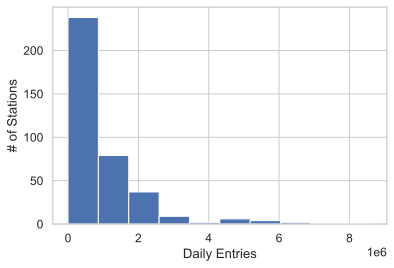

In [58]:
plt.hist(station_totals['DAILY_ENTRIES']);
plt.xlabel('Daily Entries')
plt.ylabel('# of Stations');

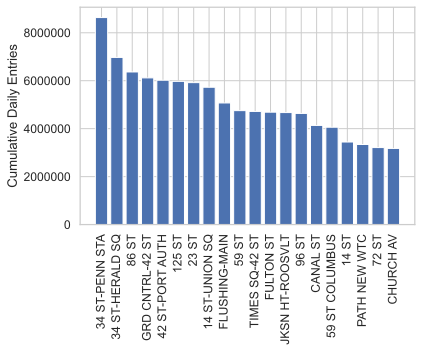

In [59]:
plt.bar(x=station_totals['STATION'][:20], height=station_totals['DAILY_ENTRIES'][:20])
plt.xticks(rotation=90);
plt.ylabel("Cumulative Daily Entries");
plt.savefig("entries_per_station.png");
plt.ticklabel_format(style='plain', axis='y')


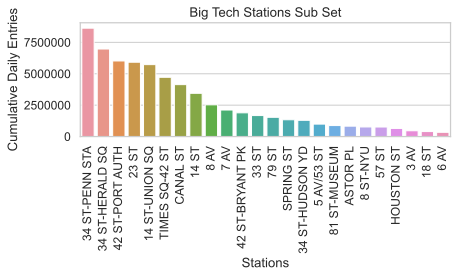

In [60]:
plot = sns.barplot(x= 'STATION', y='DAILY_ENTRIES', data=big_tech_sub_set)
plt.xticks(rotation=90)
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plot.set(xlabel='Stations', ylabel='Cumulative Daily Entries', title='Big Tech Stations Sub Set')
plt.show()

